Ось **розгорнутий контент для файлу `07_projects.ipynb`**, який містить **реальні аналітичні задачі для закріплення знань** у сфері **інформаційно-аналітичного забезпечення військових штабів** з використанням Python.

---

# 📘 `07_projects.ipynb`

## **Тема: Приклади аналітичних завдань і мініпроєктів**

---

### 🔹 Вступ

У цьому файлі подано серію прикладних завдань і мініпроєктів, які дозволяють практично застосувати здобуті знання Python, Pandas, Matplotlib та файлових операцій у реальних умовах роботи військових аналітиків.

---

## 🔸 ✅ Проєкт 1: Аналіз оперативної обстановки на основі CSV

### 🔹 Вхідні дані:

`losses.csv` — файл зі щоденними втратами:

```csv
Дата,Напрямок,Втрати,Підрозділ
2025-06-10,Схід,102,1-а мехбр
2025-06-11,Схід,134,1-а мехбр
2025-06-12,Південь,98,2-а танкбр
...
```

### 🔹 Завдання:

1. Визначити сумарні втрати по кожному напрямку.
2. Побудувати графік динаміки втрат.
3. Виділити найнебезпечніші напрямки за останні 3 дні.
4. Експортувати аналіз у файл `summary.csv`.

---

## 🔸 ✅ Проєкт 2: Побудова ситуаційного графіка

### 🔹 Завдання:

1. Завантажити бойові донесення (`reports.txt`).
2. Витягти дати, напрямки, втрати за допомогою простого парсингу.
3. Побудувати графік змін бойової ситуації.
4. Вивести повідомлення, якщо втрати на одному напрямку перевищують 150 осіб.

---

## 🔸 ✅ Проєкт 3: Генерація аналітичної довідки

### 🔹 Вихід:

* Автоматичне створення `summary_report.txt` на основі обробленого CSV-файлу з висновками:

#### ▶️ Приклад:

```
✅ Напрямок з найвищими втратами: Схід (580 осіб)
✅ Найбільш залучений підрозділ: 1-а мехбр
✅ Динаміка втрат: зростання протягом 3 останніх днів
✅ Рекомендація: посилити угруповання на східному напрямку
```

---

## 🔸 ✅ Проєкт 4: Система фільтрації бойових подій

### 🔹 Вхідні дані:

* Список подій у форматі JSON або CSV
* Поля: дата, напрям, тип події, втрати, підрозділ

### 🔹 Завдання:

* Створити фільтр подій за напрямком та типом (наступ, артобстріл)
* Порахувати середні втрати по типу подій
* Побудувати порівняльний графік (artillery vs assault)

---

## 🔸 ✅ Проєкт 5 (просунутий): Комбінована панель звітності

1. Завантаження кількох звітів
2. Групування та обчислення статистик
3. Побудова декількох графіків
4. Генерація HTML-звіту або `.docx` через шаблон

---

## 📝 Загальні інструкції до проєктів:

* Рекомендується зберігати всі проєкти в окремих підпапках.
* Вхідні файли повинні бути збережені у форматі `.csv`, `.txt`, `.json`.
* Можна додати інтерфейс командного рядка для зручного запуску аналізу.
* Кожен проєкт має містити:

  * `README.md` (опис цілей)
  * `analyze.py` або `project.ipynb`
  * приклад вихідного звіту

---

### ✅ Порада

Для кожного проєкту бажано створювати структуру:

```
project_folder/
├── data/
├── output/
├── project.ipynb
└── README.md
```



### Проєкт №1

Сумарні втрати по напрямках:
  Напрямок  Втрати
0  Південь     218
1   Північ      77
2     Схід     236


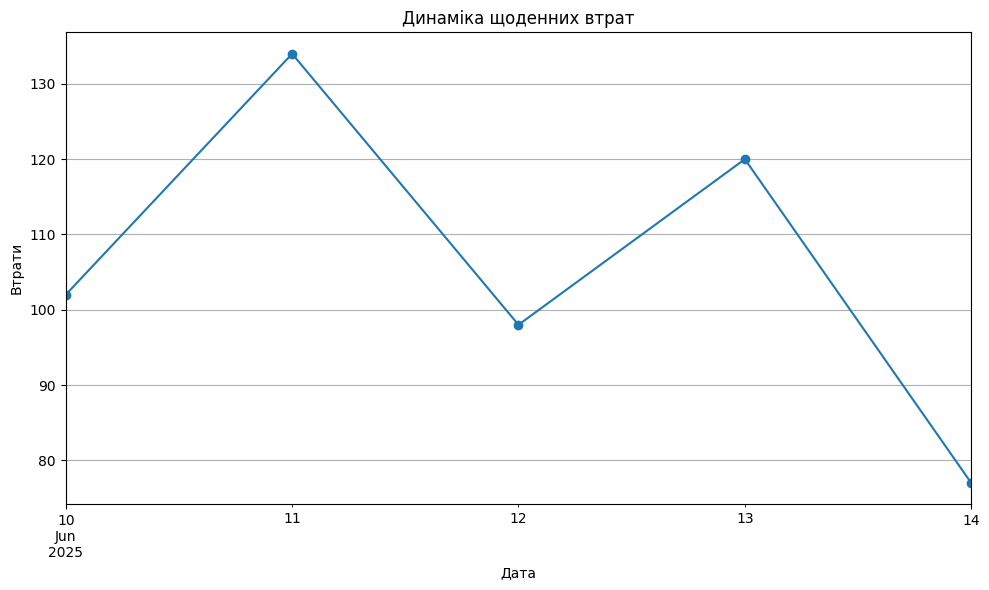


Найнебезпечніші напрямки за останні 3 дні:
  Напрямок  Втрати
0  Південь     218
1   Північ      77

Файл summary.csv успішно збережено.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Завантаження даних
data = pd.read_csv("losses.csv", parse_dates=["Дата"])

# 2. Визначити сумарні втрати по кожному напрямку
sum_by_direction = data.groupby("Напрямок")["Втрати"].sum().reset_index()
print("Сумарні втрати по напрямках:")
print(sum_by_direction)

# 3. Побудувати графік динаміки втрат
plt.figure(figsize=(10, 6))
daily_losses = data.groupby("Дата")["Втрати"].sum()
daily_losses.plot(marker='o')
plt.title("Динаміка щоденних втрат")
plt.xlabel("Дата")
plt.ylabel("Втрати")
plt.grid(True)
plt.tight_layout()
plt.savefig("losses_plot.png")  # збереження графіка
plt.show()

# 4. Найнебезпечніші напрямки за останні 3 дні
last_3_days = data["Дата"].max() - pd.Timedelta(days=2)
recent_data = data[data["Дата"] >= last_3_days]
top_directions = recent_data.groupby("Напрямок")["Втрати"].sum().reset_index()
top_directions = top_directions.sort_values(by="Втрати", ascending=False)

print("\nНайнебезпечніші напрямки за останні 3 дні:")
print(top_directions)

# 5. Експортувати підсумок у summary.csv
summary = sum_by_direction.rename(columns={"Втрати": "Сумарні втрати"})
summary["Останні 3 дні (втрати)"] = summary["Напрямок"].map(
    top_directions.set_index("Напрямок")["Втрати"].to_dict()
).fillna(0).astype(int)

summary.to_csv("summary.csv", index=False)
print("\nФайл summary.csv успішно збережено.")


### Проєкт №2

⚠️ Увага! 2025-07-01 на напрямку 'Північний' втрати склали 160 осіб.
⚠️ Увага! 2025-07-03 на напрямку 'Південний' втрати склали 200 осіб.
⚠️ Увага! 2025-07-04 на напрямку 'Південний' втрати склали 170 осіб.


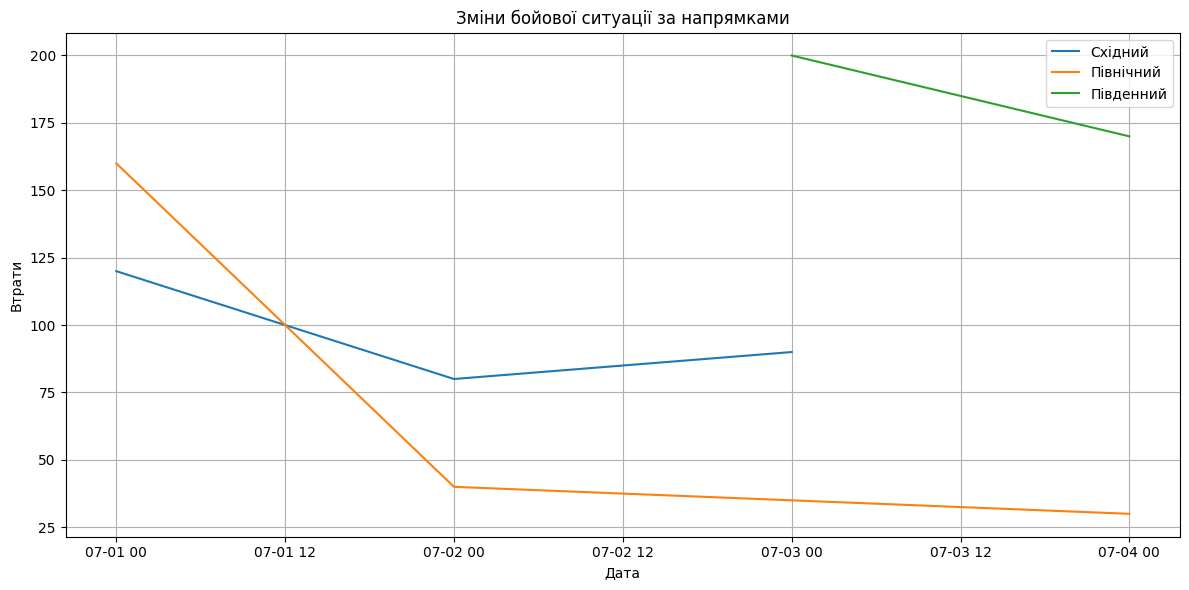

In [4]:
import matplotlib.pyplot as plt
from collections import defaultdict
import re
import datetime

# 1. Завантаження бойових донесень
with open('reports.txt', 'r', encoding='utf-8') as f:
    reports = f.readlines()

# 2. Парсинг даних
data = []

pattern = r"(\d{2}\.\d{2}\.\d{4}) - Напрямок: (.+?) - Втрати: (\d+)"
for report in reports:
    match = re.search(pattern, report)
    if match:
        date_str, direction, losses = match.groups()
        date = datetime.datetime.strptime(date_str, "%d.%m.%Y").date()
        losses = int(losses)
        data.append((date, direction, losses))

# 3. Побудова графіка
direction_data = defaultdict(list)

for date, direction, losses in data:
    direction_data[direction].append((date, losses))

# Побудова графіка для кожного напрямку
plt.figure(figsize=(12, 6))

for direction, values in direction_data.items():
    values.sort()
    dates = [d for d, l in values]
    losses = [l for d, l in values]
    plt.plot(dates, losses, label=direction)

plt.xlabel("Дата")
plt.ylabel("Втрати")
plt.title("Зміни бойової ситуації за напрямками")
plt.legend()
plt.grid(True)
plt.tight_layout()

# 4. Повідомлення про великі втрати
for date, direction, losses in data:
    if losses > 150:
        print(f"⚠️ Увага! {date} на напрямку '{direction}' втрати склали {losses} осіб.")

# Збереження графіка
plt.savefig("situation_chart.png")
plt.show()


### Проєкт №3

In [5]:
import pandas as pd
from datetime import datetime, timedelta

# 1. Зчитування CSV-файлу
data = pd.read_csv("losses.csv", parse_dates=["Дата"])

# 2. Аналіз напрямку з найбільшими втратами
sum_by_direction = data.groupby("Напрямок")["Втрати"].sum()
top_direction = sum_by_direction.idxmax()
top_direction_value = sum_by_direction.max()

# 3. Аналіз підрозділу з найбільшими втратами
sum_by_unit = data.groupby("Підрозділ")["Втрати"].sum()
top_unit = sum_by_unit.idxmax()

# 4. Аналіз динаміки втрат за останні 3 дні
last_date = data["Дата"].max()
recent_data = data[data["Дата"] > last_date - timedelta(days=3)]
recent_total = recent_data.groupby("Дата")["Втрати"].sum()

# Перевірка динаміки: чи зростає кількість втрат
trend = "невизначена"
if len(recent_total) >= 3:
    trend_list = recent_total.values
    if trend_list[2] > trend_list[1] > trend_list[0]:
        trend = "зростання протягом 3 останніх днів"
    elif trend_list[2] < trend_list[1] < trend_list[0]:
        trend = "зниження протягом 3 останніх днів"
    else:
        trend = "нестабільна динаміка"

# 5. Формування висновку
report_lines = [
    f"✅ Напрямок з найвищими втратами: {top_direction} ({top_direction_value} осіб)",
    f"✅ Найбільш залучений підрозділ: {top_unit}",
    f"✅ Динаміка втрат: {trend}",
    f"✅ Рекомендація: посилити угруповання на {top_direction.lower()} напрямку"
]

# 6. Запис у файл
with open("summary_report.txt", "w", encoding="utf-8") as f:
    for line in report_lines:
        f.write(line + "\n")

print("Файл summary_report.txt створено успішно ✅")


Файл summary_report.txt створено успішно ✅


### Проєкт №4

Середні втрати по типу подій:
     тип події  втрати
0  артобстріл     6.2
1      наступ    14.8


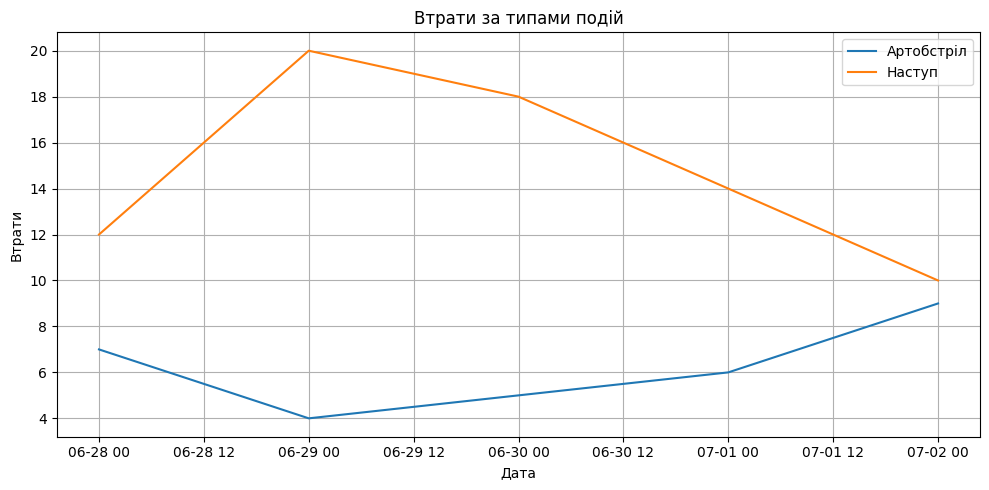

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Завантаження даних
data = pd.read_csv("events.csv", parse_dates=["дата"])

# 2. Фільтрація за напрямком та типом події
def filter_events(data, direction=None, event_type=None):
    filtered = data.copy()
    if direction:
        filtered = filtered[filtered["напрям"] == direction]
    if event_type:
        filtered = filtered[filtered["тип події"] == event_type]
    return filtered

# 3. Обчислення середніх втрат по типу подій
average_losses = data.groupby("тип події")["втрати"].mean().reset_index()
print("Середні втрати по типу подій:\n", average_losses)

# 4. Побудова графіка: Артобстріл vs Наступ
event_types = ["артобстріл", "наступ"]
compare_data = data[data["тип події"].isin(event_types)]
grouped = compare_data.groupby(["дата", "тип події"])["втрати"].sum().unstack().fillna(0)

# Побудова графіка
plt.figure(figsize=(10, 5))
plt.plot(grouped.index, grouped["артобстріл"], label="Артобстріл")
plt.plot(grouped.index, grouped["наступ"], label="Наступ")
plt.title("Втрати за типами подій")
plt.xlabel("Дата")
plt.ylabel("Втрати")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("compare_losses.png")  # збереження графіку
plt.show()


In [4]:
import pandas as pd
import glob

# Завантаження всіх CSV-файлів зі звітами з папки reports/
file_list = glob.glob("reports/*.csv")

# Зчитування кожного CSV у список датафреймів
df_list = [pd.read_csv(file) for file in file_list]

# Об'єднання всіх звітів в один датафрейм
combined_df = pd.concat(df_list, ignore_index=True)

# Виведення перших рядків об'єднаного датафрейму
print(combined_df.head())


         Дата Напрямок   Тип події  Втрати   Підрозділ
0  2025-07-01     Схід      Наступ     120   1-а мехбр
1  2025-07-01  Південь  Артобстріл      45  36-а обрмп
2  2025-07-02     Схід  Артобстріл      65   1-а мехбр
3  2025-07-02   Північ      Наступ      30  58-а омпбр
4  2025-07-03  Південь      Наступ      80  36-а обрмп


In [5]:
# Групування за напрямком і типом події
grouped_stats = combined_df.groupby(["Напрямок", "Тип події"]).agg({
    "Втрати": ["sum", "mean", "max", "count"]
}).reset_index()

# Перейменування колонок для зручності
grouped_stats.columns = ["Напрямок", "Тип події", "Сума втрат", "Середні втрати", "Максимальні втрати", "Кількість подій"]

print(grouped_stats)


  Напрямок   Тип події  Сума втрат  Середні втрати  Максимальні втрати  \
0    Захід  Артобстріл          20            20.0                  20   
1  Південь  Артобстріл          45            45.0                  45   
2  Південь      Наступ          80            80.0                  80   
3   Північ      Наступ          30            30.0                  30   
4     Схід  Артобстріл          65            65.0                  65   
5     Схід      Наступ         120           120.0                 120   

   Кількість подій  
0                1  
1                1  
2                1  
3                1  
4                1  
5                1  


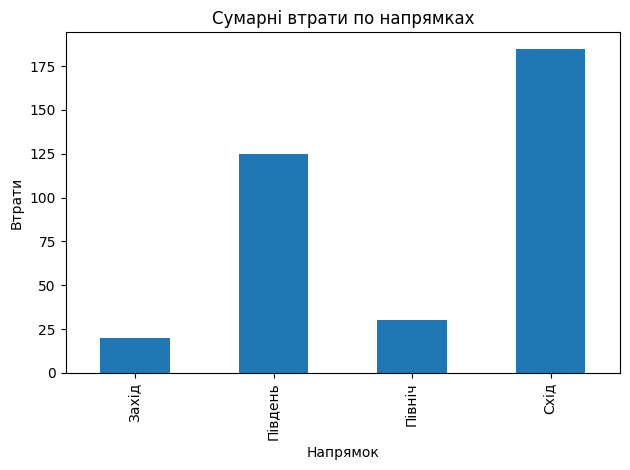

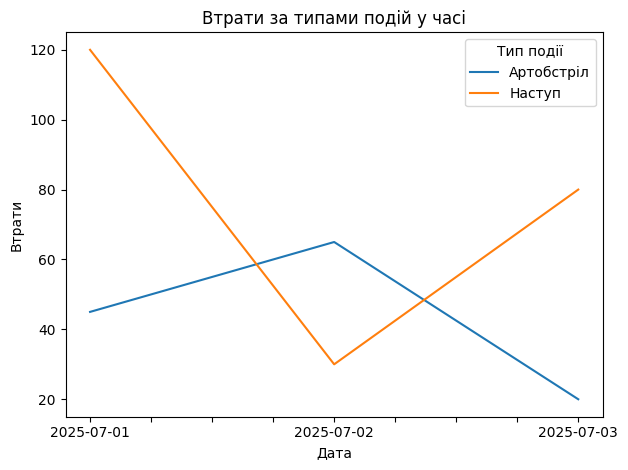

In [6]:
import matplotlib.pyplot as plt

# Графік 1: Сума втрат по напрямках
sum_by_direction = combined_df.groupby("Напрямок")["Втрати"].sum()
sum_by_direction.plot(kind="bar", title="Сумарні втрати по напрямках")
plt.ylabel("Втрати")
plt.xlabel("Напрямок")
plt.tight_layout()
plt.savefig("graph_total_losses.png")
plt.show()

# Графік 2: Порівняння втрат за типами подій
pivot = combined_df.pivot_table(index="Дата", columns="Тип події", values="Втрати", aggfunc="sum")
pivot.plot(title="Втрати за типами подій у часі")
plt.ylabel("Втрати")
plt.xlabel("Дата")
plt.tight_layout()
plt.savefig("graph_event_types.png")
plt.show()


In [7]:
# Генерація простого HTML-звіту
with open("report.html", "w", encoding="utf-8") as f:
    f.write("<h1>Звіт про бойові події</h1>")
    f.write(grouped_stats.to_html(index=False))
    f.write("<p><strong>Додано графіки:</strong></p>")
    f.write('<img src="graph_total_losses.png" width="600"><br>')
    f.write('<img src="graph_event_types.png" width="600"><br>')


In [10]:
from docx import Document
from docx.shared import Inches

doc = Document()
doc.add_heading("Аналітичний звіт", 0)

doc.add_heading("Статистика по напрямках і типах подій", level=1)
table = doc.add_table(rows=1, cols=len(grouped_stats.columns))
hdr_cells = table.rows[0].cells
for i, column in enumerate(grouped_stats.columns):
    hdr_cells[i].text = column

for _, row in grouped_stats.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        row_cells[i].text = str(round(value, 2)) if isinstance(value, float) else str(value)

doc.add_page_break()
doc.add_heading("Діаграми", level=1)
doc.add_picture("graph_total_losses.png", width=Inches(5.5))
doc.add_picture("graph_event_types.png", width=Inches(5.5))

doc.save("звіт.docx")


In [9]:
!pip install python-docx


   ---------------------------------------- 0.0/253.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/253.0 kB ? eta -:--:--
   ------ -------------------------------- 41.0/253.0 kB 653.6 kB/s eta 0:00:01
   ------------------------- -------------- 163.8/253.0 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 253.0/253.0 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   -- ------------------------------------- 0.2/4.0 MB 4.9 MB/s eta 0:00:01
   ----- ---------------------------------- 0.5/4.0 MB 5.3 MB/s eta 0:00:01
   ---------- ----------------------------- 1.1/4.0 MB 7.5 MB/s eta 0:00:01
   ---------------- ----------------------- 1.7/4.0 MB 8.2 MB/s eta 0:00:01
   ------------------ --------------------- 1.9/4.0 MB 8.6 MB/s eta 0:00:01
   ------------------ --------------------- 1.9/4.0 MB 8.6 MB/s eta 0:00:01
   ------------------------ --------------- 2.5/4.0 MB 7.5 MB/s eta 0:00:01
   -------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\5103_6\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
